# Predicting average star rating in Yelp data

## Data exploration

In [1]:
!ls

Dataset_Challenge_Dataset_Agreement.pdf json_to_csv_yelp.py
Untitled.ipynb                          photo.json
Yelp_Dataset_Challenge_Round_13.pdf     review.csv
Yelp_data_exploration.ipynb             review.json
business.json                           tip.json
checkin.json                            user.json


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
business_df = pd.read_json("business.json", lines=True)

In [4]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
len(business_df)

192609

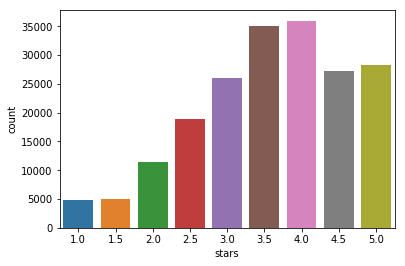

In [6]:
# sns.set(style="darkgrid")
# ax = sns.countplot(x="city", hue="stars", data=business_df)
ax = sns.countplot(x="stars", data=business_df)

/Users/etheredgej/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


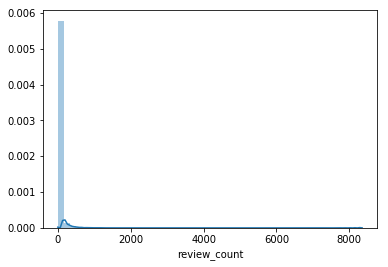

In [7]:
# ax = sns.distplot(business_df["review_count"][business_df["review_count"]>1000])
ax = sns.distplot(business_df["review_count"])

## Temporarily ignoring individual reviews

In [8]:
# review_df = pd.read_csv("review.csv", parse_dates=["date"]) 
# converted .json to .csv with a script due to some peculiarities in the formatting

In [9]:
# review_df.head()

In [10]:
# review_df.info()

## Some initial modeling

- We'll temporarily table the review_df.
- Eventually we can join on the business_id.
- For now, however, we'll probably exclude it after our initial model, since it's a unique identifier.

In [11]:
y = business_df["stars"]
x = business_df.drop(["stars"], axis=1)

In [12]:
x.hours.isnull().values.sum()

44830

In [13]:
y.isnull().values.any()

False

In [14]:
x.is_open.isnull().values.any()

False

In [15]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


- need to figure out how to unpack hours, categories, and attributes

In [16]:
s = x["categories"].str.split(',')

In [17]:
print(s[0], type(s[0]))

['Golf', ' Active Life'] <class 'list'>


In [18]:
# try this for unpacking list in the column
new_cols = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [19]:
def unpack_column(df,col_name):
    if type(df[col_name][0]) == 'list':
        s = df[col_name]    
    else:
        s = df[col_name].str.split(',')
    new_cols = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
    new_cols.fillna(0, inplace=True)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df = new_df.drop([col_name],axis=1)
    return new_df

In [20]:
x = unpack_column(x,"categories")

In [21]:
x.head()

,address,attributes,business_id,city,hours,is_open,latitude,longitude,name,postal_code,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x.dtypes

address                              object
attributes                           object
business_id                          object
city                                 object
hours                                object
is_open                               int64
latitude                            float64
longitude                           float64
name                                 object
postal_code                          object
review_count                          int64
state                                object
 & Probates                         float64
 3D Printing                        float64
 ATV Rentals/Tours                  float64
 Acai Bowls                         float64
 Accessories                        float64
 Accountants                        float64
 Acne Treatment                     float64
 Active Life                        float64
 Acupuncture                        float64
 Addiction Medicine                 float64
 Adoption Services              

In [23]:
x.postal_code

0           85016
1         L5R 3E7
2           28210
3           85338
4           28217
5         L5V 0B1
6         T2Z 1K4
7           89121
8           85308
9           44126
10        T2R 1L3
11          85016
12          28117
13          44060
14          44094
15        L4B 3G6
16          85254
17          89119
18          89121
19        M5V 1K4
20          89101
21          89032
22          89118
23          15231
24          89149
25          89156
26        M3B 1Y6
27        M5R 2C7
28          89102
29        M6J 1J5
           ...   
192579      85213
192580      89109
192581      85282
192582    M1R 5B3
192583    M5R 1C1
192584      89101
192585    L6P 3A3
192586      89107
192587    M4Y 1Z3
192588      15203
192589      44333
192590      28078
192591      85226
192592        M5N
192593    H2T 1N9
192594      44224
192595    L1V 1C1
192596    H2L 1Z1
192597      89052
192598      89123
192599      85234
192600      85076
192601      85054
192602      44121
192603    

In [24]:
x.isnull().values.sum()

1263242

In [25]:
# first pass we're going to drop some inconvenient features
x = x.drop(["hours","attributes","address","business_id","city","name","postal_code"], axis=1)

In [26]:
x.isnull().values.sum()

1189576

In [27]:
x = pd.get_dummies(x) # should just be state at this point

In [28]:
x.isnull().values.sum()

1189576

In [29]:
def show_null_columns_head(df):
    null_columns=df.columns[df.isnull().any()]
    return df[df.isnull().any(axis=1)][null_columns].head()

In [30]:
show_null_columns_head(x)

,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
x.head()

,is_open,latitude,longitude,review_count,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_XGL,state_XGM,state_XWY
0,0,33.522143,-112.018481,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,43.605499,-79.652289,128,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,35.092564,-80.859132,170,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,33.455613,-112.395596,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,35.190012,-80.887223,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x.fillna(0, inplace=True)

In [33]:
x.isnull().values.sum()

0

In [34]:
x.dtypes

is_open                   int64
latitude                float64
longitude               float64
review_count              int64
 & Probates             float64
 3D Printing            float64
 ATV Rentals/Tours      float64
 Acai Bowls             float64
 Accessories            float64
 Accountants            float64
 Acne Treatment         float64
 Active Life            float64
 Acupuncture            float64
 Addiction Medicine     float64
 Adoption Services      float64
 Adult                  float64
 Adult Education        float64
 Adult Entertainment    float64
 Advertising            float64
 Aerial Fitness         float64
 Aerial Tours           float64
 Aestheticians          float64
 Afghan                 float64
 African                float64
 Air Duct Cleaning      float64
 Aircraft Dealers       float64
 Aircraft Repairs       float64
 Airlines               float64
 Airport Lounges        float64
 Airport Shuttles       float64
                         ...   
state_BC

In [35]:
x.isnull().values.sum()

0

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

## Let's see how well we can model the entire dataset with a first-pass model without any hyperparameter tuning (apart from the number of trees)
- (I'm fully aware we would should not fit and predict on the same dataset)

In [37]:
from sklearn.ensemble import RandomForestRegressor

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [39]:
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
preds = rf.predict(x)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mean_squared_error(y, preds)

0.1580106196606565

## Baseline error: Predict the mean

In [45]:
pred_mean = y.mean()

In [46]:
pred_mean

3.585626839867296

In [48]:
mean_squared_error(y, [pred_mean]*len(y))

1.0372518903243808